In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

#### importation d'image

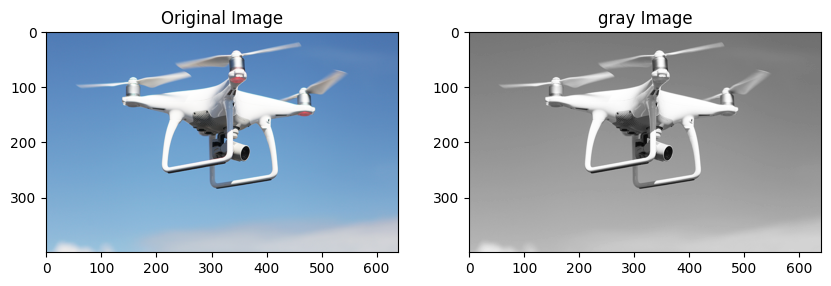

In [3]:

img = cv2.imread('datas/drone.png') 
#img = cv2.imread('datas/euro.jpeg')

imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(imgrgb)
ax1.set_title('Original Image')
ax2.imshow(gray, cmap='gray')
ax2.set_title('gray Image')
plt.show()




### 1. Sobel edge detection

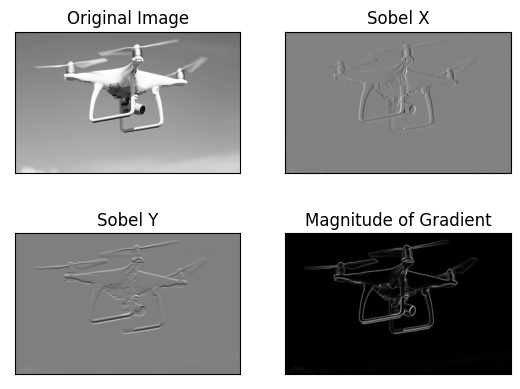

In [4]:
# Apply Sobel filter in the x and y directions
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

# Calculate the magnitude and direction of the gradient
mag, angle = cv2.cartToPolar(sobelx, sobely, angleInDegrees=True)

# Display the results using Matplotlib
plt.subplot(2, 2, 1), plt.imshow(gray, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(mag, cmap='gray')
plt.title('Magnitude of Gradient'), plt.xticks([]), plt.yticks([])
plt.show()

### 2. Prewitt edge detection 

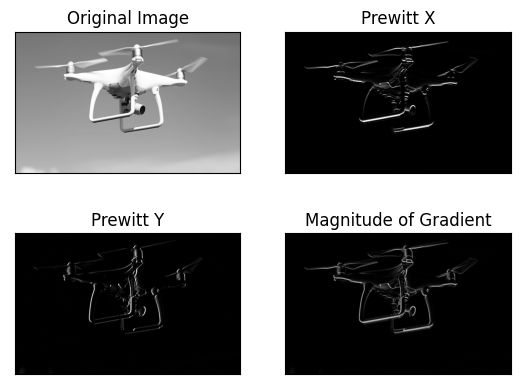

In [5]:
# Apply Prewitt filter in the x and y directions
kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]).astype(np.float64)
kernely = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]).astype(np.float64)
prewittx = cv2.filter2D(gray, -1, kernelx)
prewitty = cv2.filter2D(gray, -1, kernely)
prewittx = prewittx.astype(np.float64)
prewitty = prewitty.astype(np.float64)
# Calculate the magnitude and direction of the gradient
mag, angle = cv2.cartToPolar(prewittx, prewitty, angleInDegrees=True)

# Display the results using Matplotlib
plt.subplot(2, 2, 1), plt.imshow(gray, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(prewittx, cmap='gray')
plt.title('Prewitt X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(prewitty, cmap='gray')
plt.title('Prewitt Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(mag, cmap='gray')
plt.title('Magnitude of Gradient'), plt.xticks([]), plt.yticks([])
plt.show()

##### prewitx + prewity

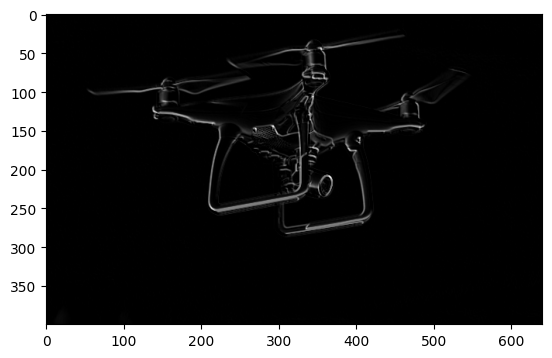

In [6]:
plt.imshow(prewittx+prewitty, cmap="gray")
plt.show()

### 3. Laplacien edge detection

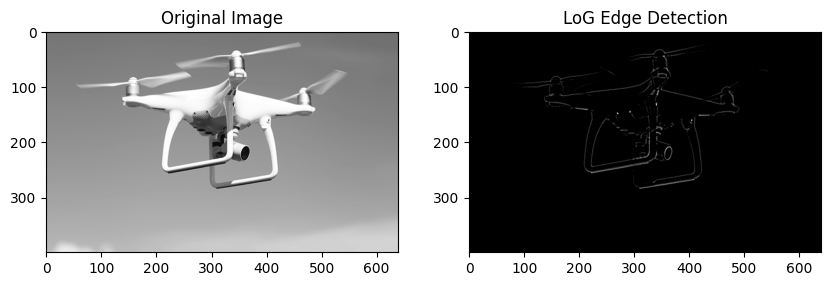

In [77]:
# Apply Gaussian smoothing
img_smooth = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Laplacian operator
laplacian = cv2.Laplacian(img_smooth, cv2.CV_64F)

# Threshold the image
threshold = np.max(laplacian) * 0.1
laplacian[laplacian < threshold] = 0

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(laplacian, cmap='gray')
ax[1].set_title('LoG Edge Detection')
plt.show()

### 4. Roberts edge detection

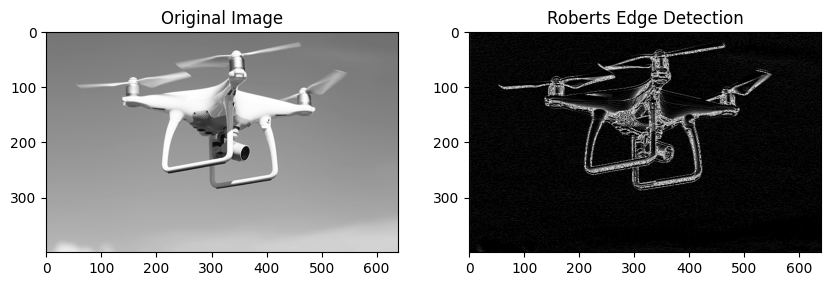

In [8]:
# Define the Roberts kernels
kernel_x = np.array([[1, 0], [0, -1]])
kernel_y = np.array([[0, 1], [-1, 0]])

# Apply the kernels to the image
roberts_x = cv2.filter2D(gray, -1, kernel_x)
roberts_y = cv2.filter2D(gray, -1, kernel_y)

# Combine the x and y edges
roberts = np.sqrt(np.square(roberts_x) + np.square(roberts_y))

# Threshold the image
threshold = np.max(roberts) * 0.01
roberts[roberts < threshold] = 0

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(roberts, cmap='gray')
ax[1].set_title('Roberts Edge Detection')
plt.show()

### 5. canny edge detection 

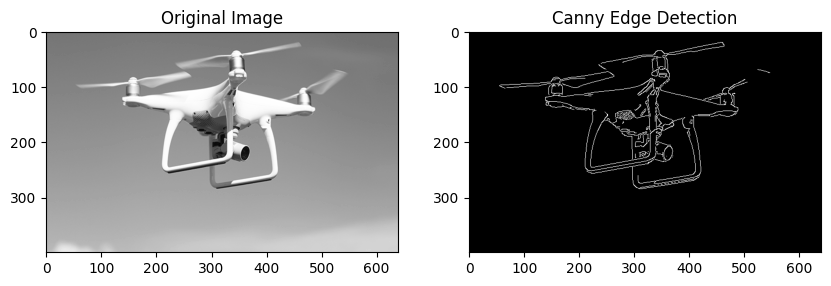

In [9]:
# Apply Canny edge detection
canny = cv2.Canny(gray, 100, 200)

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(canny, cmap='gray')
ax[1].set_title('Canny Edge Detection')
plt.show()

### Canny edge detection algorithm

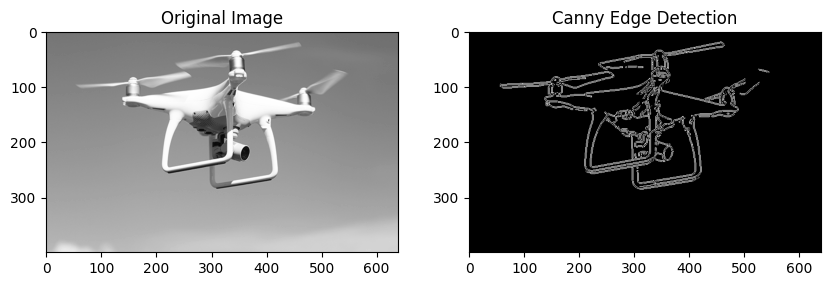

In [10]:
# Apply Gaussian smoothing
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Calculate the gradient using Sobel filters
grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude and direction
grad_mag = np.sqrt(np.square(grad_x) + np.square(grad_y))
grad_dir = np.arctan2(grad_y, grad_x)

# Apply non-maximum suppression
grad_max = np.zeros_like(grad_mag)
for i in range(1, grad_mag.shape[0]-1):
    for j in range(1, grad_mag.shape[1]-1):
        if (grad_dir[i,j] >= -np.pi/8 and grad_dir[i,j] <= np.pi/8) or \
           (grad_dir[i,j] >= 7*np.pi/8 or grad_dir[i,j] <= -7*np.pi/8):
            if grad_mag[i,j] >= grad_mag[i,j+1] and grad_mag[i,j] >= grad_mag[i,j-1]:
                grad_max[i,j] = grad_mag[i,j]
        elif (grad_dir[i,j] >= np.pi/8 and grad_dir[i,j] <= 3*np.pi/8) or \
             (grad_dir[i,j] >= -7*np.pi/8 and grad_dir[i,j] <= -5*np.pi/8):
            if grad_mag[i,j] >= grad_mag[i+1,j+1] and grad_mag[i,j] >= grad_mag[i-1,j-1]:
                grad_max[i,j] = grad_mag[i,j]
        elif (grad_dir[i,j] >= 3*np.pi/8 and grad_dir[i,j] <= 5*np.pi/8) or \
             (grad_dir[i,j] >= -5*np.pi/8 and grad_dir[i,j] <= -3*np.pi/8):
            if grad_mag[i,j] >= grad_mag[i+1,j] and grad_mag[i,j] >= grad_mag[i-1,j]:
                grad_max[i,j] = grad_mag[i,j]
        else:
            if grad_mag[i,j] >= grad_mag[i-1,j+1] and grad_mag[i,j] >= grad_mag[i+1,j-1]:
                grad_max[i,j] = grad_mag[i,j]

# Apply double thresholding
threshold_low = 0.1 * np.max(grad_max)
threshold_high = 0.3 * np.max(grad_max)
canny = np.zeros_like(grad_max)
canny[grad_max > threshold_high] = 255
canny[(grad_max >= threshold_low) & (grad_max <= threshold_high)] = 127

# Apply hysteresis thresholding
canny = cv2.Canny(canny.astype(np.uint8), 100, 200)

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(canny, cmap='gray')
ax[1].set_title('Canny Edge Detection')
plt.show()




### Final : détection de contour

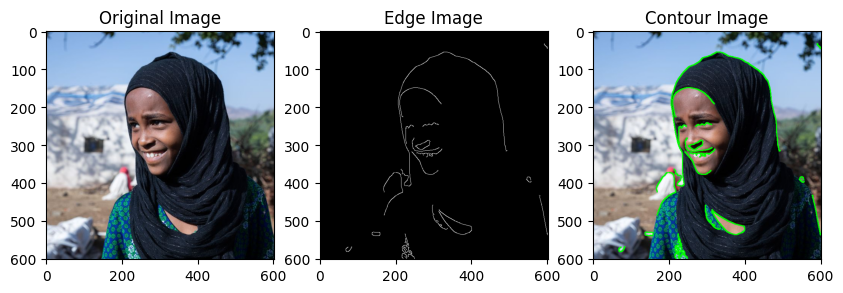

In [83]:
img1 = cv2.imread('datas/wo.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray1, (7,7), 0)

color = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Apply Canny edge detection to find edges
edges = cv2.Canny(blur, 100, 240)


# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_img = cv2.drawContours(img1, contours, -1, (0, 255, 0), 2)

# Plot the results using Matplotlib
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(color)
ax[0].set_title('Original Image')
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Edge Image')
ax[2].imshow(contour_img[:,:,::-1])
ax[2].set_title('Contour Image')
plt.show()

##### with gui

In [12]:
""" # Apply thresholding to create a binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

# Display the original image with the contours drawn on it
cv2.imshow('Image with Contours', img)
cv2.waitKey(0)
cv2.destroyAllWindows() """

" # Apply thresholding to create a binary image\nret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)\n\n# Find contours in the binary image\ncontours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)\n\n# Draw the contours on the original image\ncv2.drawContours(img, contours, -1, (0, 255, 0), 3)\n\n# Display the original image with the contours drawn on it\ncv2.imshow('Image with Contours', img)\ncv2.waitKey(0)\ncv2.destroyAllWindows() "